In [293]:
import xgboost as xgb
xgb.__version__

'0.71'

In [294]:
import pandas as pd
from scipy.stats import skew

import numpy as np

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train['source']=1
test['source']=0

test['Quality_of_life_measure']=-1



all_data=train.append(test)

print(all_data.shape)
print(train.shape,test.shape)


(1252, 42)
(1010, 42) (242, 42)


Convert NAs to medians 

In [295]:


cols_null=['%_Sanitation_Access',
 'Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]',
 'Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]',
 'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
 'Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]',
 'CPI_AGRWTH',
 'EDU_TERTIARY_PC_WKGPOP',
 'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
 'GDP_USD_CAP',
 'GOV_SPEND_EDU',
 'Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]',
 'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
 'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
 'Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]',
 'TER_Enrolment_rate',
 'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
 'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]']


for col in cols_null:
    if all_data[col].dtype=='object':
        all_data[col].fillna(all_data[col].value_counts().idxmax(),inplace=True)
    else:
        all_data[col].fillna(all_data[col].median(),inplace=True)
  
all_data.loc[all_data.source==1].shape

(1010, 42)

In [296]:
all_data.describe()

%_Sanitation_Access  \
count          1252.000000   
mean             97.187220   
std               5.647353   
min              62.300000   
25%              97.700000   
50%              99.100000   
75%              99.800000   
max             100.000000   

       Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]  \
count                                        1252.000000                                                 
mean                                           98.638112                                                 
std                                             5.095178                                                 
min                                             5.353355                                                 
25%                                           100.000000                                                 
50%                                           100.000000                                                 
75%                                           100.000000                                                 
max                                           100.000000                                                 

       Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]  \
count                                        1252.000000                                          
mean                                           99.211684                                          
std                                             5.442361                                          
min                                             5.353355                                          
25%                                           100.000000                                          
50%                                           100.000000                                          
75%                                           100.000000                                          
max                                           100.000000                                          

       Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]  \
count                                        1252.000000                            
mean                                           99.602606                            
std                                             4.143614                            
min                                             5.353355                            
25%                                           100.000000                            
50%                                           100.000000                            
75%                                           100.000000                            
max                                           100.000000                            

       Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]  \
count                                        1252.000000                                          
mean                                           99.927210                                          
std                                             0.598693                                          
min                                            91.400000                                          
25%                                           100.000000                                          
50%                                           100.000000                                          
75%                                           100.000000                                          
max                                           100.000000                                          

        CPI_AGRWTH  EDU_TERTIARY_PC_WKGPOP  \
count  1252.000000             1252.000000   
mean      2.493964               28.931281   
std       2.217961               10.397131   
min      -4.478103                7.007294   
2

In [297]:
df1=pd.get_dummies(all_data.TIME)
all_data=pd.concat([df1,all_data],axis=1)
all_data.drop('TIME',axis=1,inplace=True)
all_data.head()


1993  1994  1995  1996  1997  1998  1999  2000  2001  2002   ...    \
0     1     0     0     0     0     0     0     0     0     0   ...     
1     1     0     0     0     0     0     0     0     0     0   ...     
2     0     1     0     0     0     0     0     0     0     0   ...     
3     0     1     0     0     0     0     0     0     0     0   ...     
4     0     0     1     0     0     0     0     0     0     0   ...     

   Quality_of_life_measure  \
0                 0.172055   
1                 0.238161   
2                 0.173419   
3                 0.239558   
4                 0.173718   

   Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]  \
0                                            17220.0                   
1                                            17220.0                   
2                                            17042.0                   
3                                            17042.0                   
4                                            16631.0                   

   Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]  \
0                                              10.55                                           
1                                              10.55                                           
2                                              10.19                                           
3                                              10.19                                           
4                                               9.62                                           

   Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]  \
0                                        197804.8632        
1                                        197804.8632        
2                                        193855.2090        
3                                        193855.2090        
4                                        199700.4005        

   Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]  \
0                                           8.616992                 
1                                           8.616992                 
2                                           8.259947                 
3                                           8.259947                 
4                                           8.217806                 

   TER_Enrolment_rate  \
0           65.428513   
1           64.678619   
2           66.160980   
3           66.824181   
4           68.701340   

   Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]  \
0                                           163236.0                 
1                                           163236.0                 
2                                           167169.0                 
3                                           167169.0                 
4                                           172805.0                 

   Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]  \
0                                        2295520.952                            
1                                        2295520.952                            
2                                        2346930.376                            
3                                        2346930.376                            
4                                        2430093.957                            

   id  source  
0   1       1  
1   2       1  
2   3       1  
3   4       1  
4   5       1  

[5 rows x 65 columns]

In [298]:
df1=pd.get_dummies(all_data.GENDER)
all_data=pd.concat([df1,all_data],axis=1)
all_data.drop('GENDER',axis=1,inplace=True)
all_data.head()


MEN  WOMEN  1993  1994  1995  1996  1997  1998  1999  2000   ...    \
0    1      0     1     0     0     0     0     0     0     0   ...     
1    0      1     1     0     0     0     0     0     0     0   ...     
2    1      0     0     1     0     0     0     0     0     0   ...     
3    0      1     0     1     0     0     0     0     0     0   ...     
4    1      0     0     0     1     0     0     0     0     0   ...     

   Quality_of_life_measure  \
0                 0.172055   
1                 0.238161   
2                 0.173419   
3                 0.239558   
4                 0.173718   

   Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]  \
0                                            17220.0                   
1                                            17220.0                   
2                                            17042.0                   
3                                            17042.0                   
4                                            16631.0                   

   Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]  \
0                                              10.55                                           
1                                              10.55                                           
2                                              10.19                                           
3                                              10.19                                           
4                                               9.62                                           

   Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]  \
0                                        197804.8632        
1                                        197804.8632        
2                                        193855.2090        
3                                        193855.2090        
4                                        199700.4005        

   Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]  \
0                                           8.616992                 
1                                           8.616992                 
2                                           8.259947                 
3                                           8.259947                 
4                                           8.217806                 

   TER_Enrolment_rate  \
0           65.428513   
1           64.678619   
2           66.160980   
3           66.824181   
4           68.701340   

   Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]  \
0                                           163236.0                 
1                                           163236.0                 
2                                           167169.0                 
3                                           167169.0                 
4                                           172805.0                 

   Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]  \
0                                        2295520.952                            
1                                        2295520.952                            
2                                        2346930.376                            
3                                        2346930.376                            
4                                        2430093.957                            

   id  source  
0   1       1  
1   2       1  
2   3       1  
3   4       1  
4   5       1  

[5 rows x 66 columns]

In [299]:
all_data.columns=['MEN','WOMEN',
                  '1993'  , '1994'   ,                                                                                            
                  '1995',   '1996',                                                                                          
'1997','1998',                                                                                         
'1999', '2000',                                                                                         
'2001', '2002',                                                                                        
'2003', '2004',                                                                                        
'2005', '2006',                                                                                        
'2007', '2008',                                                                                        
'2009', '2010',                                                                                       
'2011', '2012',                                                                                      
'2013', '2014',                                                                                      
'2015', '2016',
'Sanitation',
 'CleanFuels',
 'Electricity_Rural',
 'Electricity_Total',
 'Electricity_Urban',
 'CPI',
 'EDU_TERTIARY',
 'Energy_Intensity',
 'GDP_USD_CAP',
 'GNI',
 'GOV_SPEND_EDU',
 'LOCATION',
 'PopulationM/F',
 'Population00-04',
 'Population05-09',
 'Population10-14',
 'Population15-19',
 'Population20-24',
 'Population25-29',
 'Population30-34',
 'Population35-39',
 'Population40-44',
 'Population45-49',
 'Population50-54',
 'Population55-59',
 'Population60-64',
 'Population65-69',
 'Population70-74',
 'Population75-79',
 'Population80+',
 'Quality_of_life_measure',
 'Renewable_Electricity_Output',
 'Renewable_Electricity_Share',
 'Renewable_Energy_Consumption',
 'Renewable_Energy_Perc',
 'TER_Enrolment_rate',
 'Total_Electricity_Output',
 'Total_Energy_Consumption',
 'id',
 'source']


In [300]:
train=all_data[all_data.source==1]
test=all_data[all_data.source==0]
y=train.Quality_of_life_measure
cols=[i for i in train.columns if i not in ['id','Quality_of_life_measure','LOCATION','source']]

X=train.loc[:,cols]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape)


(808, 62) (202, 62)


In [301]:
import seaborn as sns
%matplotlib inline


In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline



#Build our cross validation method
kfolds = KFold(n_splits=10, shuffle=True, random_state=23)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)

In [303]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor  # Ensemble methods
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor # Linear models
from sklearn.linear_model import RidgeCV,LassoCV
from xgboost import XGBRegressor
lm=ExtraTreesRegressor()
#lm=XGBRegressor()
benchmark_model = make_pipeline(RobustScaler(),
                                lm).fit(X=X, y=y)
cv_rmse(benchmark_model).mean()



0.020202303260500595

In [287]:
model_ridge = RidgeCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
cv_rmse(make_pipeline(RobustScaler(),model_ridge)).mean()

0.075761637463793413

In [288]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
cv_rmse(make_pipeline(RobustScaler(),model_lasso)).mean()

/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.11205089422408096

In [289]:

lm=XGBRegressor()
cv_rmse(make_pipeline(RobustScaler(),lm)).mean()

0.033105028309215655

In [264]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
cv_rmse(make_pipeline(RobustScaler(),elastic)).mean()

0.11205089422408096

In [265]:
lm=RandomForestRegressor()
benchmark_model = make_pipeline(RobustScaler(),
                                lm).fit(X=X, y=y)
cv_rmse(benchmark_model).mean()



0.027938061242860808

In [268]:
lm=BaggingRegressor()
benchmark_model = make_pipeline(RobustScaler(),
                                lm).fit(X=X, y=y)
cv_rmse(benchmark_model).mean()



0.029717366728413203

In [307]:
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from xgboost import XGBRegressor, plot_importance # XGBoost
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(X_train, y_train)
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
# test 
select_X_test = selection.transform(X_test)
select_test = selection.transform(test.loc[:,cols])


print(select_X_train.shape,X_train.shape)
print(select_X_test.shape)
print ("XGB Version: " + str(xgb.__version__))

(808, 34) (808, 62)
(202, 34)
XGB Version: 0.71


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_Ridge: -0.006629 (+/- 0.001648)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Elastic: -0.012672 (+/- 0.002753)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_Lasso: -0.012672 (+/- 0.002753)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_SVR: -0.005284 (+/- 0.000760)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_RF: -0.001101 (+/- 0.000629)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_ET: -0.000621 (+/- 0.000441)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_BR: -0.001111 (+/- 0.000614)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

Scaled_XGB: -0.001276 (+/- 0.000564)


/Users/priya/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


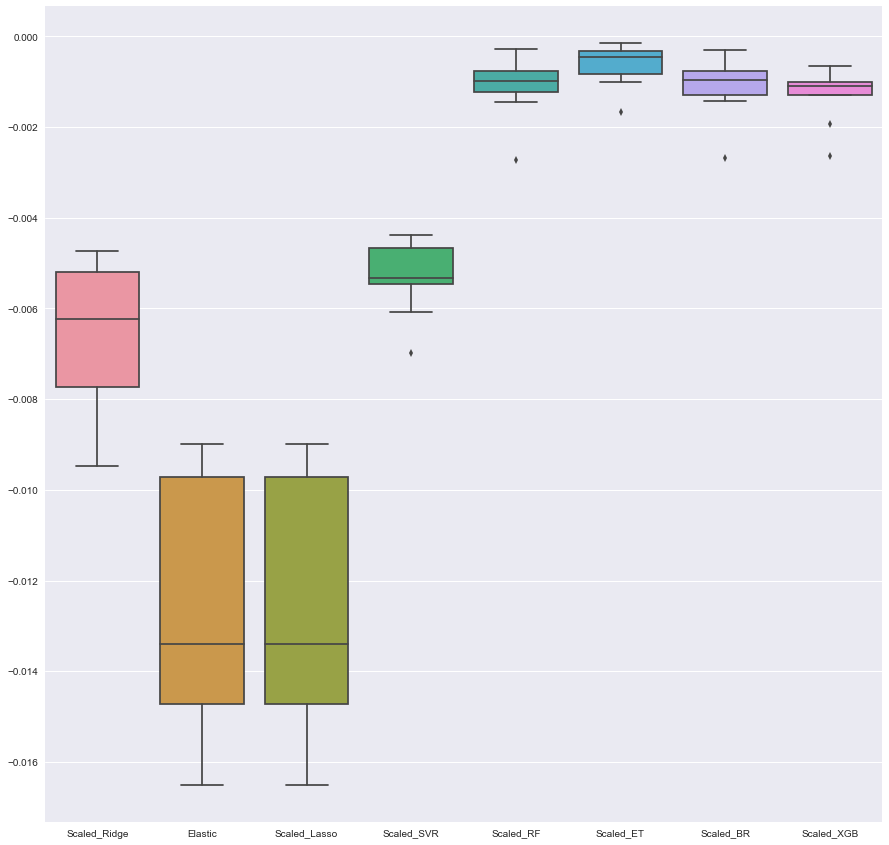

In [308]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import ElasticNet
pipelines = []
from pylab import rcParams
rcParams['figure.figsize'] = 15 ,15
seed=42
pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed))
                      ]))
                )
pipelines.append(
                ("Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Elastic", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR", SVR())
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_XGB",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGB", XGBRegressor(seed=seed))
                 ])
                )
                )

scoring = 'mean_squared_error'
n_folds = 10
results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, select_X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
results = pd.DataFrame(np.array(results).T, columns = names)    
sns.boxplot(results)
plt.show()

In [309]:
all_data.LOCATION.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CZE', 'DEU', 'DNK',
       'ESP', 'EST', 'FIN', 'GBR', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA',
       'JPN', 'KOR', 'LUX', 'LVA', 'NLD', 'POL', 'PRT', 'SVK', 'SVN',
       'SWE', 'TUR', 'ZAF', 'CHE', 'FRA', 'GRC', 'MEX', 'NOR', 'NZL', 'USA'], dtype=object)

Empty DataFrame
Columns: [MEN, WOMEN, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, Sanitation, CleanFuels, Electricity_Rural, Electricity_Total, Electricity_Urban, CPI, EDU_TERTIARY, Energy_Intensity, GDP_USD_CAP, GNI, GOV_SPEND_EDU, LOCATION, PopulationM/F, Population00-04, Population05-09, Population10-14, Population15-19, Population20-24, Population25-29, Population30-34, Population35-39, Population40-44, Population45-49, Population50-54, Population55-59, Population60-64, Population65-69, Population70-74, Population75-79, Population80+, Quality_of_life_measure, Renewable_Electricity_Output, Renewable_Electricity_Share, Renewable_Energy_Consumption, Renewable_Energy_Perc, TER_Enrolment_rate, Total_Electricity_Output, Total_Energy_Consumption, id, source]
Index: []

[0 rows x 66 columns]